### О задании ###
В этом задании вы:

* Познакомитесь с методом решения задачи регрессии на основе метода ближайших соседей.
* Реализуете алгоритм kNN для задачи регрессии.
* Изучите методы работы с категориальными и текстовыми переменными.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sklearn
import math

**Бербер Кирилл, 317 группа**

In [13]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [14]:
data.shape

(48895, 16)

In [15]:
# число значений у признаков
for col_name in data.columns:
    print(col_name, len(data[col_name].unique()))

id 48895
name 47906
host_id 37457
host_name 11453
neighbourhood_group 5
neighbourhood 221
latitude 19048
longitude 14718
room_type 3
price 674
minimum_nights 109
number_of_reviews 394
last_review 1765
reviews_per_month 938
calculated_host_listings_count 47
availability_365 366


In [16]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [17]:
data['name'].fillna('Name',inplace = True)

In [18]:
data['host_name'].fillna('host_name', inplace = True)

In [19]:
data['reviews_per_month'].fillna(0,inplace = True)

In [20]:
data['last_review'].fillna(pd.to_datetime("2018-10-19"),inplace = True)

In [21]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2018-10-19 00:00:00,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2018-10-19 00:00:00,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2018-10-19 00:00:00,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2018-10-19 00:00:00,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2018-10-19 00:00:00,0.00,6,2


In [22]:
data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [23]:
len(data[data['price'] == 0])

11

удалили строки, в которых цена за съем равна 0 (явно ошибка)

In [24]:
len(data[data['price'] == 0])

11

In [25]:
data.corr().style.background_gradient(cmap = 'coolwarm').set_precision(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.00,0.59,-0.00,0.09,0.01,-0.01,-0.32,0.18,0.13,0.09
host_id,0.59,1.00,0.02,0.13,0.02,-0.02,-0.14,0.21,0.15,0.20
latitude,-0.00,0.02,1.00,0.08,0.03,0.02,-0.02,-0.02,0.02,-0.01
longitude,0.09,0.13,0.08,1.00,-0.15,-0.06,0.06,0.14,-0.11,0.08
price,0.01,0.02,0.03,-0.15,1.00,0.04,-0.05,-0.05,0.06,0.08
minimum_nights,-0.01,-0.02,0.02,-0.06,0.04,1.00,-0.08,-0.12,0.13,0.14
number_of_reviews,-0.32,-0.14,-0.02,0.06,-0.05,-0.08,1.00,0.59,-0.07,0.17
reviews_per_month,0.18,0.21,-0.02,0.14,-0.05,-0.12,0.59,1.00,-0.05,0.16
calculated_host_listings_count,0.13,0.15,0.02,-0.11,0.06,0.13,-0.07,-0.05,1.00,0.23
availability_365,0.09,0.20,-0.01,0.08,0.08,0.14,0.17,0.16,0.23,1.00


ничего не увидели бросающегося в глаза

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']), data[['price']],
                                                    test_size=0.3, random_state=241)

In [48]:
X_train.shape

(34226, 15)


## Часть 1: Алгоритм kNN в задаче регрессии ##

**1.1 (1.5 балла)** Реализуйте класс KNNRegressor, который используя метод k ближайших соседей решает задачу регрессии. Для решение данной задачи, необходимо найти $N_k$ - k соседей, и после использовать значения их целевых переменных для предсказания:$$\begin{align}
y = \frac{1}{k}\sum_{n \in N_k}w_n y_n,
\end{align}$$

где $w_n$ - вес каждого соседа.

При этом KNNRegressor может работать в 2 режимах:

$uniform$ - ближайшие соседи учитываются с одинаковыми весами.

$distance$ - вес ближайших соседей зависит от расстояния
Сигнатуру методов, классов, функции при желании можно менять.

In [27]:
from typing import Union, Callable, Iterable, Optional
from sklearn.neighbors import NearestNeighbors


class KNNRegressor:
    def __init__(self, n_neighbors: int, metric: Union[str, Callable], mode: str = 'uniform'):
        """
        params:
            n_neighbors: number of neighbors
            metric: metric to use for distance computation
            mode: 'uniform' or 'distance'
            'uniform' - all points in each neighborhood are weighted equally
            'distance' - weight points by the inverse of their distance
        """
        if metric == 'overlap':
            self.__nn = NearestNeighbors(n_neighbors=n_neighbors, metric=overlap)#pyfunc 
        elif metric == 'flattened_overlap':
            self.__nn = NearestNeighbors(n_neighbors=n_neighbors, metric=flattened_overlap, algorithm = 'brute')
        elif metric == 'log_overlap':
            self.__nn = NearestNeighbors(n_neighbors=n_neighbors, metric=log_overlap, algorithm = 'brute')
        else:
            self.__nn = NearestNeighbors(n_neighbors=n_neighbors, metric=metric)#pyfunc
        self.__mode = mode
        self.__n_neighbors = n_neighbors

    def fit(self, X: np.array, y: np.array) -> None:
        """
            X: data
            y: labels
        """
        self.__nn.fit(X, y)
        self.X = X
        self.Y = y
        #pass

    def predict(self, X: np.array, n_neighbors: Optional[int] = None) -> np.array:
        """
            X: data
            n_neighbors: number of neighbors
        """
        if self.__mode == 'distance':
            dist = self.__nn.kneighbors(X, self.__n_neighbors, return_distance = True)[0]
            ind =  self.__nn.kneighbors(X, self.__n_neighbors, return_distance = True)[1]               
            pred = np.sum(np.array(list(self.Y['price']))[ind.reshape(-1)].reshape(ind.shape[0], -1)* 1/(dist+0.00005), axis=1)/np.sum(1/(dist+0.00005), axis=1)
        else:
            ind =  self.__nn.kneighbors(X, self.__n_neighbors, return_distance = False)
            #print(ind)
            pred = np.sum(np.array(list(self.Y['price']))[ind.reshape(-1)].reshape(ind.shape[0], -1), axis=1) / self.__n_neighbors
        # Ваш код здесь
        return pred
        #pass

## Часть 2: Категориальные признаки ##

**2.1 (1 балл)** Реализуйте три функции расстояния на категориальных признаках (в этом задании только на них!) , которые обсуждались на втором семинаре. Не забудьте, что KNNRegressor должен уметь работать с этими функциями расстояния. Как вариант, можно реализовать метрики как user-defined distance.

Здесь выполняется часть задания номер 2, по поиску категориальных признаков

In [28]:
vec_1 = ['a', 'b', 'd']
vec_2 = np.array(['a', 'bc', 'd'])

In [29]:
X_categ_train = pd.DataFrame()
X_categ_train['neighbourhood_group'] = X_train['neighbourhood_group']
X_categ_train['neighbourhood'] = X_train['neighbourhood']
X_categ_train['room_type'] = X_train['room_type']

In [30]:
X_categ_test = pd.DataFrame()
X_categ_test['neighbourhood_group'] = X_test['neighbourhood_group']
X_categ_test['neighbourhood'] = X_test['neighbourhood']
X_categ_test['room_type'] = X_test['room_type']
#X_categ_test

In [31]:
X_categ_train['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [32]:
i = 0
for var in data['neighbourhood_group'].unique():
    X_categ_train['neighbourhood_group'][X_categ_train['neighbourhood_group']== var] = i
    X_categ_test['neighbourhood_group'][X_categ_test['neighbourhood_group']== var] = i
    i+=1
i = 0
for var in data['neighbourhood'].unique():
    X_categ_train['neighbourhood'][X_categ_train['neighbourhood']== var] = i
    X_categ_test['neighbourhood'][X_categ_test['neighbourhood']== var] = i
    i+=1
i = 0
for var in data['room_type'].unique():
    print(var)
    X_categ_train['room_type'][X_categ_train['room_type'] == var] = i
    X_categ_test['room_type'][X_categ_test['room_type']== var] = i
    i+=1

Private room
Entire home/apt
Shared room


----------------------------------------------

In [33]:
ng = (X_categ_train['neighbourhood_group'].unique())
ng

array([0, 1, 2, 4, 3], dtype=object)

In [34]:
ng.sort()
ng

array([0, 1, 2, 3, 4], dtype=object)

In [35]:
ng = (X_categ_train['neighbourhood_group'].unique())
ng.sort()
ng_c = list(X_categ_train.groupby('neighbourhood_group').count()['neighbourhood'])
ng_c

[14061, 15179, 3969, 257, 760]

In [36]:
X_categ_train['neighbourhood_group'].unique()

array([0, 1, 2, 4, 3], dtype=object)

In [37]:
#ng_c

In [38]:
nh = X_categ_train['neighbourhood'].unique()
nh.sort()
nh_c = list(X_categ_train.groupby('neighbourhood').count()['neighbourhood_group'])
#nh_c

In [1323]:
nh = np.append(nh, 131)
nh = np.append(nh, 218)
#nh

In [1324]:
nh_c = np.append(nh_c, 0)
nh_c = np.append(nh_c, 0)
#nh_c

In [1223]:
rt = X_categ_train['room_type'].unique()
rt.sort()
rt_c = list(X_categ_train.groupby('room_type').count()['neighbourhood_group'])
rt_c

[15563, 17846, 817]

In [1225]:
s = np.array([(ng, ng_c), (nh, nh_c), (rt, rt_c)])
len(s[0][0])

5

In [1298]:
def overlap(x, z):
    return np.sum(x != z)

def flattened_overlap(x, z):
    # Ваш код здесь
    d = 0
    l = len(x)
    for i in range (l):
        
        k = s[i][1][np.arange(len(s[i][1]))[(np.where(s[i][0] == x[i]))][0]]
        #k = s[i][1][np.where(s[i][0] == x[i])]
        #print('k', k)
        #k = s[i][1][np.where(s[i][0] == x[i])[0]]
        summ = 0
        ll = np.sum(s[i][1])
        n = len(s[i][0])
        for j in range(n):
            if(s[i][1][j] <= k):
                summ += s[i][1][j] * (s[i][1][j] - 1) / (ll * (ll - 1))
        d += (x[i] != z[i]) + (x[i] == z[i]) * summ
    return d

def log_overlap(x, z):
    summ = 0
    l = len(x)
    for i in range(l):
        summ += (x[i] != z[i]) * math.log(s[i][1][np.arange(len(s[i][1]))[(np.where(s[i][0] == x[i]))][0]] + 1)* math.log(s[i][1][np.arange(len(s[i][1]))[(np.where(s[i][0] == z[i]))][0]] + 1)
    return summ

In [1309]:
print(overlap(X_categ_train.iloc[0], X_categ_train.iloc[2]))
print(flattened_overlap(X_categ_train.iloc[0], X_categ_train.iloc[2]))
print(log_overlap(X_categ_train.iloc[0], X_categ_train.iloc[2]))

2
2.2073256095125355
106.2577222711173


In [2044]:
print(overlap(X_categ_train.iloc[0], X_categ_train.iloc[1]))
print(flattened_overlap(X_categ_train.iloc[0], X_categ_train.iloc[1]))
print(log_overlap(X_categ_train.iloc[0], X_categ_train.iloc[1]))

3
3.0
213.01884669286193


**2.2 (1 балл)** Найдите все категориальные признаки в данных. Подсчитайте для каждой из метрик качество на тестовой выборке X_test при числе соседей $k = 10$. Качество измеряйте с помощью RMSE.

Какая функция расстояния оказалась лучшей? Почему?

Сами признаки мы нашли и перекодировали выше, для того чтобы predict мог выдавать корректные значения 

In [1303]:
NN_2 = KNNRegressor(10, metric='overlap', mode = 'uniform')
NN_2.fit(X_categ_train[:1000], y_train[:1000])
a =  NN_2.predict(X_categ_test[:100], n_neighbors=10)
#len(y_test['price'][:10])
#y_test[:10]
#a - y_test[:10]
np.sqrt(np.sum(np.square((a - y_test['price'][:100]))) / len(a))

142.63733312145177

In [1306]:
NN_3 = KNNRegressor(10, metric='flattened_overlap', mode = 'uniform')
NN_3.fit(X_categ_train[:1000], y_train[:1000])
a =  NN_3.predict(X_categ_test[:100], n_neighbors=10)

np.sqrt(np.sum(np.square((a - y_test['price'][:100]))) / len(a))

141.39021430070756

In [1310]:
NN_4 = KNNRegressor(10, metric='log_overlap', mode = 'uniform')
NN_4.fit(X_categ_train[:1000], y_train[:1000])
a =  NN_4.predict(X_categ_test[:100], n_neighbors=10)

np.sqrt(np.sum(np.square((a - y_test['price'][:100]))) / len(a))

136.04703892404277

на этой выборке log_overlap справился лучше остальных

Посмотрим на выборку большего размера

In [1319]:
NN_2 = KNNRegressor(10, metric='overlap', mode = 'distance')
NN_2.fit(X_categ_train[:10000], y_train[:10000])
a =  NN_2.predict(X_categ_test[:1000], n_neighbors=10)
#len(y_test['price'][:10])
#y_test[:10]
#a - y_test[:10]
np.sqrt(np.sum(np.square((a - y_test['price'][:1000]))) / len(a))

284.724586708392

здесь мы взяли подвыборку побольше, и "качество" overlap - самое лучшее (самое маленькое отклонение)

In [2348]:
NN_5 = KNNRegressor(10, metric='log_overlap', mode = 'distance')
NN_5.fit(X_categ_train[:10000], y_train[:10000])
a =  NN_5.predict(X_categ_test[:1000], n_neighbors=10)
#len(y_test['price'][:10])
#y_test[:10]
#a - y_test[:10]
np.sqrt(np.sum(np.square((a - y_test['price'][:1000]))) / len(a))

285.9442693300948

log overlap выдает числа немного большие чем overlap

In [2047]:
NN_6 = KNNRegressor(10, metric='flattened_overlap', mode = 'distance')
NN_6.fit(X_categ_train[:10000], y_train[:10000])
a =  NN_6.predict(X_categ_test[:1000], n_neighbors=10)
#len(y_test['price'][:10])
#y_test[:10]
#a - y_test[:10]
np.sqrt(np.sum(np.square((a - y_test['price'][:1000]))) / len(a))

285.7619750926333

flattened_overlap работал дольше всех в силу реализации, но все равно уступает в точности overlap

лучшие показания на overlap, но разница небольшая

Возможно, это связано с тем, что данные хорошо подходят под простой overlap и в overlap или flattened overlap нет необходимости. Стоит отметить, что различие результатов на выборке 10000 обучающей и 1000 тестовой небольшое. Вероятнее всего, log_overlap должен показать себя лучше, потому что учитывает несколько (2) признаков, в отличие от overlap, который просто смотрит на сравнение.

**2.3 (1 балл) бонус** Подберите лучшее (на тестовой выборке) число соседей $k$ для каждой из функций расстояния. Какого удалось достичь уровня качества?

In [1321]:
for i in range(1,11):
    NN_1n = KNNRegressor(i, metric='overlap', mode = 'distance')
    NN_1n.fit(X_categ_train[:1000], y_train[:1000])
    a =  NN_1n.predict(X_categ_test[:100], n_neighbors=10)
    print(i, 'neib -', np.sqrt(np.sum(np.square((a - y_test['price'][:100]))) / len(a)))

1 neib - 152.41210581840275
2 neib - 152.43118209095692
3 neib - 148.73552401478176
4 neib - 141.11418896040811
5 neib - 133.54874038251845
6 neib - 137.6105637293663
7 neib - 135.54184366585648
8 neib - 136.20882445377015
9 neib - 136.54784170028063
10 neib - 137.28029399070923


In [1670]:
NN_20n = KNNRegressor(20, metric='overlap', mode = 'distance')
NN_20n.fit(X_categ_train[:1000], y_train[:1000])
a =  NN_20n.predict(X_categ_test[:100], n_neighbors=10)
print(' 20 neib -', np.sqrt(np.sum(np.square((a - y_test['price'][:100]))) / len(a)))
NN_50n = KNNRegressor(50, metric='overlap', mode = 'distance')
NN_50n.fit(X_categ_train[:1000], y_train[:1000])
a =  NN_50n.predict(X_categ_test[:100], n_neighbors=10)
print(' 50 neib -', np.sqrt(np.sum(np.square((a - y_test['price'][:100]))) / len(a)))

 20 neib - 138.05653178009166
 50 neib - 139.09547734993635


In [1664]:
for i in range(1,11):
    NN_1n = KNNRegressor(i, metric='flattened_overlap', mode = 'distance')
    NN_1n.fit(X_categ_train[:1000], y_train[:1000])
    a =  NN_1n.predict(X_categ_test[:100], n_neighbors=10)
    print(i, 'neib -', np.sqrt(np.sum(np.square((a - y_test['price'][:100]))) / len(a)))

1 neib - 147.8955712656738
2 neib - 125.10658788704198
3 neib - 130.28237674332132
4 neib - 153.1262986023293
5 neib - 149.41667079589325
6 neib - 148.54681851157193
7 neib - 141.50959122463252
8 neib - 141.75992924809887
9 neib - 142.77783010916744
10 neib - 140.71401820517806


In [1671]:
NN_20n = KNNRegressor(20, metric='flattened_overlap', mode = 'distance')
NN_20n.fit(X_categ_train[:1000], y_train[:1000])
a =  NN_20n.predict(X_categ_test[:100], n_neighbors=10)
print(' 20 neib -', np.sqrt(np.sum(np.square((a - y_test['price'][:100]))) / len(a)))
NN_50n = KNNRegressor(50, metric='flattened_overlap', mode = 'distance')
NN_50n.fit(X_categ_train[:1000], y_train[:1000])
a =  NN_50n.predict(X_categ_test[:100], n_neighbors=10)
print(' 50 neib -', np.sqrt(np.sum(np.square((a - y_test['price'][:100]))) / len(a)))

 20 neib - 140.82608678575107
 50 neib - 138.32146880590346


In [1317]:
for i in range(1,11):
    NN_1n = KNNRegressor(i, metric='log_overlap', mode = 'distance')
    NN_1n.fit(X_categ_train[:1000], y_train[:1000])
    a =  NN_1n.predict(X_categ_test[:100], n_neighbors=10)
    print(i, 'neib -', np.sqrt(np.sum(np.square((a - y_test['price'][:100]))) / len(a)))

1 neib - 145.77180797397006
2 neib - 126.42608253046947
3 neib - 131.59549431591142
4 neib - 131.14017262252247
5 neib - 134.14805045564944
6 neib - 135.37239833905585
7 neib - 136.79696494586145
8 neib - 137.92630288601717
9 neib - 138.90246672974547
10 neib - 137.27906437406048


In [1673]:
NN_20 = KNNRegressor(20, metric='log_overlap', mode = 'distance')
NN_20.fit(X_categ_train[:1000], y_train[:1000])
a =  NN_20.predict(X_categ_test[:100], n_neighbors=10)
print(' 20 neib -', np.sqrt(np.sum(np.square((a - y_test['price'][:100]))) / len(a)))
NN_50 = KNNRegressor(50, metric='log_overlap', mode = 'distance')
NN_50.fit(X_categ_train[:1000], y_train[:1000])
a =  NN_50.predict(X_categ_test[:100], n_neighbors=10)
print(' 50 neib -', np.sqrt(np.sum(np.square((a - y_test['price'][:100]))) / len(a)))

 20 neib - 138.66749512194363
 50 neib - 138.52475654526032


Для обычного overlap лучшее качество достигается на 5-ти соседях

для log_overlap и flattened_overlap на двух соседях.

Лучшее качество, которого удалось достичь на выборке из 1000 train и 100 тест - отклонение порядка 125. Здесь мы считали в цикле, для нескольких значений k, поэтому брали не очень большую выборку.

**2.4 (2.5 балла)** Отойдем ненадолго от задачи регрессии и перейдём к задаче классификации: будем определять, являеться ли квартира дорогой $(target = 1)$ или дешевой $(target = 0)$. Будем считать дорогими квариры, цена которых выше среднего.

In [1371]:
data['target'] = (data.price > data.price.mean()).astype(int)

Реализуйте счетчики, которые заменят категориальные признаки на вещественные.

А именно, для каждого категориального признака $f_j(x)$ необходимо сделать следующее:

Число counts объектов в обучающей выборке с таким же значением признака.$$\begin{align}
counts_j(c) = \sum_{i=1}^l [f_j(x_i) = c]
\end{align}$$
Число successes объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака.$$\begin{align}
successes_j(c) = \sum_{i=1}^l[f_j(x_i) = c][y_i = +1].
\end{align}$$
Сглаженное отношение двух предыдущих величин:$$\begin{align}
p_j(c) = \frac{successes_j(c) + a}{counts_j(c) + b},
\end{align}$$
где $a$ и $b$ - априорные счетчики (например, a = 1, b = 2).

In [239]:
def counters(x):
    counts = np.zeros_like(x)
    for i in (np.unique(x)):
        counts[np.where(x == i)[0]] = len(np.where(x == i)[0])
    #print('c -',counts)
    succ = np.zeros_like(x)
    for i in (np.unique(x)): 
        succ[np.where(x == i)[0]] = np.sum(data['target'][(np.where(x == i)[0])])
    result = (succ + 1) / (counts + 2)

    # Ваш код здесь
    return result

Поскольку признаки, содержащие информацию о целевой переменной, могут привести к переобучению, может оказаться полезным сделать фолдинг: разбить обучающую выборку на $n$ частей, и для $i$-й части считать counts и successes по всем остальным частям. Для тестовой выборки используются счетчики, посчитанный по всей обучающей выборке. Реализуйте и такой вариант. Достаточно взять $n = 3$.

In [240]:
def fold_counters(x, test=False):
    if type(test) != bool:
        counts = np.zeros_like(test)
        succ = np.zeros_like(test)
        for i in (np.unique(test)):
            counts[np.where(test == i)[0]] = len(np.where(x == i)[0])
        for i in (np.unique(test)):
            succ[np.where(test == i)[0]] = np.sum(data['target'][(np.where(x == i)[0])])    
        return (succ + 1) / (counts + 2)
            
    lx = len(x) //3
    x1 = x[:lx]
    x2 = x[lx: 2*lx]
    x3 = x[2*lx:]
    counts1 = np.zeros_like(x1)
    counts2 = np.zeros_like(x1)
    for i in (np.unique(x1)):
        counts1[np.where(x1 == i)[0]] = len(np.where(x2 == i)[0])
        counts2[np.where(x1 == i)[0]] = len(np.where(x3 == i)[0])
    counts1 += counts2
    succ1 = np.zeros_like(x1)
    succ2 = np.zeros_like(x1)
    for i in (np.unique(x1)):
        succ1[np.where(x1 == i)[0]] = np.sum(data['target'][lx + (np.where(x2 == i)[0])])
        succ2[np.where(x1 == i)[0]] = np.sum(data['target'][2*lx + (np.where(x3 == i)[0])])
    succ1 += succ2
    #------------------------------------------------------
    counts3 = np.zeros_like(x2)
    counts4 = np.zeros_like(x2)
    for i in (np.unique(x2)):
        counts3[np.where(x2 == i)[0]] = len(np.where(x1 == i)[0])
        counts4[np.where(x2 == i)[0]] = len(np.where(x3 == i)[0])
    counts3 += counts4
    succ3 = np.zeros_like(x2)
    succ4 = np.zeros_like(x2)
    for i in (np.unique(x2)):
        succ3[np.where(x2 == i)[0]] = np.sum(data['target'][(np.where(x1 == i)[0])])
        succ4[np.where(x2 == i)[0]] = np.sum(data['target'][2*lx+(np.where(x3 == i)[0])])
    succ3 += succ4
    #------------------------------------------------------
    counts5 = np.zeros_like(x3)
    counts6 = np.zeros_like(x3)
    for i in (np.unique(x3)):
        counts5[np.where(x3 == i)[0]] = len(np.where(x1 == i)[0])
        counts6[np.where(x3 == i)[0]] = len(np.where(x2 == i)[0])
    counts5 += counts6
    succ5 = np.zeros_like(x3)
    succ6 = np.zeros_like(x3)
    for i in (np.unique(x3)):
        succ5[np.where(x3 == i)[0]] = np.sum(data['target'][(np.where(x1 == i)[0])])
        succ6[np.where(x3 == i)[0]] = np.sum(data['target'][lx+(np.where(x2 == i)[0])])
    succ5 += succ6
    counts = np.concatenate((counts1, counts3, counts5))
    succ = np.concatenate((succ1, succ3, succ5))
    #print(succ[-20:])
    #print(counts[-20:])
    result = (succ + 1) / (counts + 2)
    return result

In [1681]:
fold_counters(X_train['neighbourhood'], X_test['neighbourhood'])

array([0.3116883116883117, 0.2977667493796526, 0.29163636363636364, ...,
       0.2837100545596259, 0.26, 0.2936378466557912], dtype=object)


Посчитайте на тесте AUC-ROC метода $k$ ближайших соседей с евклидовой метрикой для выборки, где категориальные признаки заменены на счетчики. Сравните по AUC-ROC два варианта формирования выборки — с фолдингом и без. Не забудьте подобрать наилучшее число соседей $k$.

In [2006]:
col1_train = counters(X_train['neighbourhood_group'])[:, np.newaxis]
col2_train = counters(X_train['neighbourhood'])[:, np.newaxis]
col3_train = counters(X_train['room_type'])[:, np.newaxis]
col1_test = fold_counters(X_train['neighbourhood_group'], X_test['neighbourhood_group'])[:, np.newaxis]
col2_test = fold_counters(X_train['neighbourhood'], X_test['neighbourhood'])[:, np.newaxis]
col3_test = fold_counters(X_train['room_type'], X_test['room_type'])[:, np.newaxis]

matr_tr = np.concatenate((col1_train, col2_train, col3_train), axis=1)
matr_test = np.concatenate((col1_test, col2_test, col3_test), axis=1)

In [2007]:
mart_c = np.concatenate((matr_tr, matr_test), axis=0)

In [2008]:
mart_c

array([[0.28429211405816684, 0.29133858267716534, 0.2855123674911661],
       [0.29280021078980306, 0.32786885245901637, 0.2904527117884357],
       [0.28557038529337697, 0.30036630036630035, 0.2855123674911661],
       ...,
       [0.29280021078980306, 0.2837100545596259, 0.2904527117884357],
       [0.28429211405816684, 0.26, 0.2855123674911661],
       [0.29280021078980306, 0.2936378466557912, 0.2904527117884357]],
      dtype=object)

In [2138]:
MDF = pd.DataFrame(mart_c, columns=['neighbourhood_group', 'neighbourhood', 'room_type'])

In [2139]:
data = pd.read_csv('AB_NYC_2019.csv')

In [2140]:
data['target'] = (data.price > data.price.mean()).astype(int)

In [2141]:
data['reviews_per_month'].fillna(0,inplace = True)

In [2142]:
data_2 = data.drop('neighbourhood_group', axis = 1)

In [2143]:
data_2 = data_2.drop('neighbourhood', axis = 1)

In [2144]:
data_2 = data_2.drop('room_type', axis = 1)

In [2145]:
data_2 = data_2.drop('name', axis = 1)

In [2146]:
data_2 = data_2.drop('host_name', axis = 1)

In [2147]:
data_2 = data_2.drop('last_review', axis = 1)

In [2148]:
data_2 = data_2.drop('host_id', axis = 1)

In [2149]:
data_2 = data_2.drop('id', axis = 1)

In [2150]:
data_2 = data_2.drop('price', axis = 1)

In [2151]:
data_2 = pd.concat([data_2, MDF], axis=1)

In [2343]:
data_2

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,target,neighbourhood_group,neighbourhood,room_type
0,40.64749,-73.97237,1,9,0.21,6,365,0,0.284292,0.291339,0.285512
1,40.75362,-73.98377,1,45,0.38,2,355,1,0.2928,0.327869,0.290453
2,40.80902,-73.94190,3,0,0.00,1,365,0,0.28557,0.300366,0.285512
3,40.68514,-73.95976,1,270,4.64,1,194,0,0.2928,0.293638,0.290453
4,40.79851,-73.94399,10,9,0.10,1,0,0,0.2928,0.28371,0.290453
...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,0.00,2,9,0,0.2928,0.313144,0.290453
48891,40.70184,-73.93317,4,0,0.00,2,36,0,0.2928,0.277992,0.290453
48892,40.81475,-73.94867,10,0,0.00,1,27,0,0.2928,0.28371,0.290453
48893,40.75751,-73.99112,1,0,0.00,6,2,0,0.284292,0.26,0.285512


In [2153]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(data_2.drop(columns=['target']), data_2[['target']],
                                                    test_size=0.3, random_state=241, shuffle=False)

In [2154]:
from sklearn.neighbors import KNeighborsClassifier

In [2155]:
KNN = KNeighborsClassifier(n_neighbors=3,  metric='euclidean')

In [2156]:
KNN.fit(X2_train, y2_train['target'])

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [2157]:
y_scores = KNN.predict(X2_test)

In [2159]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = y2_test['target'].to_numpy()
roc_auc_score(y_true, y_scores)

0.5723119079881487

In [2160]:
for i in range(1,21):
    KNN = KNeighborsClassifier(n_neighbors=i,  metric='euclidean')
    KNN.fit(X2_train, y2_train['target'])
    y_scores = KNN.predict(X2_test)
    y_true = y2_test['target'].to_numpy()
    print(i, '-neib', roc_auc_score(y_true, y_scores))

1 -neib 0.5698203904551015
2 -neib 0.570683246250706
3 -neib 0.5723119079881487
4 -neib 0.5659406160617343
5 -neib 0.56667460204088
6 -neib 0.5644898549658076
7 -neib 0.5657726475435505
8 -neib 0.567693873292289
9 -neib 0.5661582142232219
10 -neib 0.5646765417164255
11 -neib 0.5639932591236464
12 -neib 0.5636958942419248
13 -neib 0.5638333230295296
14 -neib 0.5630461041731478
15 -neib 0.5609633317156981
16 -neib 0.5631774105604034
17 -neib 0.5659247164048407
18 -neib 0.5616266055194771
19 -neib 0.5625007356172427
20 -neib 0.5640096440298089


лучший результат достигается на трёх соседях

In [2089]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import roc_auc_score
for i in range(1,21):
    KNN = KNeighborsClassifier(n_neighbors=i,  metric='euclidean')
    KNN.fit(matr_tr, y2_train['target'])
    y_scores = KNN.predict(matr_test)
    y_true = y2_test['target'].to_numpy()
    print(i, '-neib', roc_auc_score(y_true,y_scores))

1 -neib 0.6530086597496619
2 -neib 0.6543998840019095
3 -neib 0.6647421078659851
4 -neib 0.6660302906991923
5 -neib 0.7049336764143718
6 -neib 0.6929792538727042
7 -neib 0.758457486026232
8 -neib 0.7331184322101708
9 -neib 0.7400461901156224
10 -neib 0.7332958104957139
11 -neib 0.75735348340091
12 -neib 0.7369057711867664
13 -neib 0.760359690936498
14 -neib 0.7526405987065253
15 -neib 0.7582368748103332
16 -neib 0.7542334702390803
17 -neib 0.7590646071238272
18 -neib 0.7542869060529491
19 -neib 0.7588064532588845
20 -neib 0.7569895365302192


Точность стала выше, когда мы запускаем roc_auc_score только для закодированных (трех) признаков 

**сделаем это еще раз для выборки с фолдигами и сравним результаты**

In [2161]:
data = pd.read_csv('AB_NYC_2019.csv')

In [2162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']), data[['price']],
                                                    test_size=0.3, random_state=241)

In [2163]:
data['target'] = (data.price > data.price.mean()).astype(int)

In [2164]:
fcol1_train = fold_counters(X_train['neighbourhood_group'])[:, np.newaxis]
fcol2_train = fold_counters(X_train['neighbourhood'])[:, np.newaxis]
fcol3_train = fold_counters(X_train['room_type'])[:, np.newaxis]
fcol1_test = fold_counters(X_train['neighbourhood_group'], X_test['neighbourhood_group'])[:, np.newaxis]
fcol2_test = fold_counters(X_train['neighbourhood'], X_test['neighbourhood'])[:, np.newaxis]
fcol3_test = fold_counters(X_train['room_type'], X_test['room_type'])[:, np.newaxis]

fmatr_tr = np.concatenate((fcol1_train, fcol2_train, fcol3_train), axis=1)
fmatr_test = np.concatenate((fcol1_test, fcol2_test, fcol3_test), axis=1)

In [2165]:
fmart_c = np.concatenate((fmatr_tr, fmatr_test), axis=0)

In [2166]:
FMDF = pd.DataFrame(fmart_c, columns=['neighbourhood_group', 'neighbourhood', 'room_type'])

In [2167]:
data_3 = data.drop('neighbourhood_group', axis = 1)
data_3 = data_3.drop('neighbourhood', axis = 1)
data_3 = data_3.drop('room_type', axis = 1)
data_3 = data_3.drop('name', axis = 1)
data_3 = data_3.drop('host_name', axis = 1)
data_3 = data_3.drop('last_review', axis = 1)
data_3 = data_3.drop('host_id', axis = 1)
data_3 = data_3.drop('id', axis = 1)
data_3 = data_3.drop('price', axis = 1)
#data_3 = data_3.drop('reviews_per_month', axis = 1)

In [2168]:
data_3 = pd.concat([data_3, FMDF], axis=1)

In [2171]:
data_3['reviews_per_month'].fillna(0,inplace = True)

In [2180]:
#data_3

In [2178]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(data_3.drop(columns=['target']), data_3[['target']],
                                                    test_size=0.3, random_state=241)

In [2174]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3,  metric='euclidean')
KNN.fit(X3_train, y3_train['target'])
y_scores = KNN.predict(X3_test)

In [2084]:
import numpy as np
from sklearn.metrics import roc_auc_score
for i in range(1,21):
    KNN = KNeighborsClassifier(n_neighbors=i,  metric='euclidean')
    KNN.fit(X3_train, y3_train['target'])
    y_scores = KNN.predict(X3_test)
    y_true = y3_test['target'].to_numpy()
    print(i, '-neib', roc_auc_score(y_true, y_scores))

1 -neib 0.5752048050012135
2 -neib 0.5714134377016775
3 -neib 0.5903549093391802
4 -neib 0.5758738588124319
5 -neib 0.5882820620276323
6 -neib 0.5735941692248719
7 -neib 0.5862967922178259
8 -neib 0.5728573823552499
9 -neib 0.5817112509562864
10 -neib 0.5755201808633352
11 -neib 0.5792473481418007
12 -neib 0.5702036090515668
13 -neib 0.5756305525093656
14 -neib 0.5640206506362307
15 -neib 0.5737851843741396
16 -neib 0.5654521030861489
17 -neib 0.5739716208831255
18 -neib 0.5678818311937215
19 -neib 0.5738124250825487
20 -neib 0.5664230719973135


Лучший результат достигается также на третьем тесте

Результат без фолдов получился немного лучше, но не значительно. Стоит учесть, что результат различается несильно, из-за того, что есть остальные столбцы, значения которых могут быть большими. До запуска мы счиаем евклидовые расстояния. Т.к. значения векторов-счетчиков меньше единицы (доли), то и основной вклад в разницу расстояний будут вносить вектора с большими значениями (у нас все не нормировано). Если убрать остальные признаки, то получается точность выше.
Первый вариант без фолдов на тестовой выборке показал себя немного лучше, поскольку признаки, содержат информацию о переменной.  Это может привести к переобучению. Но это улучшение качества, вероятно, достигается только на тестовой выборке.

**2.5 (1 балл)** Вернемся к задаче регрессии. Утверждается, что для задачи регрессии можно также сделать преобразование категориальных признаков в действительные числа. Для этого достаточно для каждого значения признака $f_j$ вычислить:$$\begin{align}
p_j(c) = g(T_i | f_j(x_i) = c),
\end{align}$$

где $T_i$ - значения целевой переменной объекта $x_i$. Функция $g$ - среднее (mean) или среднеквадратичное отклонение (std).

Закодируйте категориальные признаки обоими способами и найдите значение RMSE. Используйте евклидову метрику для поиска ближайших соседей. Для какой функции $g$ значение RMSE лучше? Почему?

In [216]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']), data[['price']],
                                                    test_size=0.3, random_state=241)

In [217]:
np.mean(y_train[X_train['neighbourhood'] =='Kensington']['price'])

89.544

In [218]:
def fmean(x):
    counts = np.zeros_like(x)
    for i in (np.unique(x)):
        counts[x == i] = np.mean(y_train[x == i]['price'])
        #np.mean(y_train(np.where(x == i)[0])['price'])
    return counts

In [219]:
def fmeantest(x, x_train_start, x_train_fin):
    counts = np.zeros_like(x)
    for i in (np.unique(x)):
        if i not in (np.unique(x_train_start)):
            counts[x == i] = 0
        else:
            counts[np.where(x == i)[0]] = x_train_fin[np.where(x_train_start == i)[0]][0]
    return counts

In [220]:
#print(fmeantest(X_test['neighbourhood'], X_train['neighbourhood'],fmean(X_train['neighbourhood'])))

In [221]:
#print(fmean(X_train['neighbourhood']))

In [244]:
def fstd(x):
    counts = np.zeros_like(x)
    for i in (np.unique(x)):
        counts[x == i] = np.std(y_train[x == i]['price'])
        #np.mean(y_train(np.where(x == i)[0])['price'])
    return counts

In [245]:
def fstdtest(x, x_train_start, x_train_fin):
    counts = np.zeros_like(x)
    for i in (np.unique(x)):
        if i not in (np.unique(x_train_start)):
            counts[x == i] = 0
        else:
            counts[np.where(x == i)[0]] = x_train_fin[np.where(x_train_start == i)[0]][0]
    return counts

In [224]:
print(fstd(X_train['neighbourhood']))

[65.00676937058171 276.96172496173136 44.79094379586234 ...
 159.4740267229481 140.7952800521732 117.62792566064748]


In [225]:
data5 = pd.read_csv('AB_NYC_2019.csv')
data5['reviews_per_month'].fillna(0,inplace = True)
#data5

In [226]:
data5 = data5.drop('name', axis = 1)
data5 = data5.drop('id', axis = 1)
#data5

In [227]:
data5 = data5.drop('last_review', axis = 1)
data5 = data5.drop('host_id', axis = 1)


In [228]:
#data5

In [229]:
data5['host_name'].fillna('host_name', inplace = True)

In [235]:
X5_train, X5_test, y5_train, y5_test = train_test_split(data5.drop(columns=['price']), data[['price']],
                                                    test_size=0.3, random_state=241)

In [236]:
Trhost_name = fmean(X5_train['host_name'])
Trneighbourhood_group = fmean(X5_train['neighbourhood_group'])
Trroom_type = fmean(X5_train['room_type'])
Trneighbourhood = fmean(X5_train['neighbourhood'])

In [ ]:
Testhost_name = fmeantest(X5_test['host_name'], X5_train['host_name'], Trhost_name)
Testneighbourhood_group = fmeantest(X5_test['neighbourhood_group'], X5_train['neighbourhood_group'], Trneighbourhood_group)
Testroom_type = fmeantest(X5_test['room_type'], X5_train['room_type'], Trroom_type)
Testneighbourhood = fmeantest(X5_test['neighbourhood'], X5_train['neighbourhood'], Trneighbourhood)

In [2317]:
Trneighbourhood.shape

(34226,)

In [2318]:
X_train_new = np.concatenate((Trhost_name[:, np.newaxis], Trneighbourhood_group[:, np.newaxis], Trroom_type[:, np.newaxis], Trneighbourhood[:, np.newaxis]), axis=1)
X_test_new = np.concatenate((Testhost_name[:, np.newaxis], Testneighbourhood_group[:, np.newaxis], Testroom_type[:, np.newaxis], Testneighbourhood[:, np.newaxis]), axis=1)

In [2312]:
from sklearn.metrics import mean_squared_error

In [2322]:
for i in range(1,31):
    NN_tn = KNNRegressor(i, metric='euclidean', mode = 'distance')
    NN_tn.fit(X_train_new, y_train)
    a = NN_tn.predict(X_test_new, n_neighbors=10)
    print(i, 'neib -', np.sqrt(mean_squared_error(a, y_test['price'])))

1 neib - 324.1397902972792
2 neib - 285.01616961343564
3 neib - 273.930261422408
4 neib - 271.31714827814966
5 neib - 269.3361575069521
6 neib - 268.156534639916
7 neib - 267.1540150473472
8 neib - 266.3239229533166
9 neib - 265.78207603094125
10 neib - 265.1257391315668
11 neib - 264.64222297454455
12 neib - 264.243708870886
13 neib - 263.89391494253556
14 neib - 263.52482205840704
15 neib - 263.1097908592495
16 neib - 262.72647373462934
17 neib - 262.4934116238737
18 neib - 262.107418028118
19 neib - 261.9335905854942
20 neib - 261.6230521776449
21 neib - 261.3148738861297
22 neib - 260.95728249196713
23 neib - 260.76537315452214
24 neib - 260.4945566047932
25 neib - 260.2160424015455
26 neib - 259.9649555488757
27 neib - 259.7860270928837
28 neib - 259.6193580628382
29 neib - 259.3853222537472
30 neib - 259.1958757056155


это был mean

**теперь сделаем для std и сравним результаты**

In [2326]:
Tr_tsd_host_name = fstd(X5_train['host_name'])
Tr_std_neighbourhood_group = fstd(X5_train['neighbourhood_group'])
Tr_std_room_type = fstd(X5_train['room_type'])
Tr_std_neighbourhood = fstd(X5_train['neighbourhood'])

In [2328]:
Test_std_host_name = fstdtest(X5_test['host_name'], X5_train['host_name'], Tr_tsd_host_name)
Test_std_neighbourhood_group = fstdtest(X5_test['neighbourhood_group'], X5_train['neighbourhood_group'], Tr_std_neighbourhood_group)
Test_std_room_type = fstdtest(X5_test['room_type'], X5_train['room_type'], Tr_std_room_type)
Test_std_neighbourhood = fstdtest(X5_test['neighbourhood'], X5_train['neighbourhood'], Tr_std_neighbourhood)

In [2330]:
X_train_new_std = np.concatenate((Tr_tsd_host_name[:, np.newaxis], Tr_std_neighbourhood_group[:, np.newaxis], Tr_std_room_type[:, np.newaxis], Tr_std_neighbourhood[:, np.newaxis]), axis=1)
X_test_new_std = np.concatenate((Test_std_host_name[:, np.newaxis], Test_std_neighbourhood_group[:, np.newaxis], Test_std_room_type[:, np.newaxis], Test_std_neighbourhood[:, np.newaxis]), axis=1)

In [2331]:
for i in range(1,31):
    NN_ts = KNNRegressor(i, metric='euclidean', mode = 'distance')
    NN_ts.fit(X_train_new_std, y_train)
    a = NN_ts.predict(X_test_new_std, n_neighbors=10)
    print(i, 'neib -', np.sqrt(mean_squared_error(a, y_test['price'])))

1 neib - 266.52943272701145
2 neib - 245.60188206228523
3 neib - 241.1942027240818
4 neib - 241.943658932572
5 neib - 239.74774617480992
6 neib - 241.38231873880545
7 neib - 239.95305633178003
8 neib - 239.70979587966735
9 neib - 238.5521045168453
10 neib - 237.722745545395
11 neib - 237.37726440898481
12 neib - 236.77581854568092
13 neib - 236.31078274837193
14 neib - 236.47071573155446
15 neib - 236.34708869252884
16 neib - 236.20190494966246
17 neib - 235.93135566933572
18 neib - 235.78293085550396
19 neib - 235.58491811675225
20 neib - 235.4175357202529
21 neib - 237.11399706152568
22 neib - 236.81070759754815
23 neib - 236.55219859812507
24 neib - 236.33866454914323
25 neib - 236.1496782625926
26 neib - 236.0466033461123
27 neib - 235.9246626275156
28 neib - 235.7917062811332
29 neib - 235.62534470033785
30 neib - 235.43890011132805


Для функции 𝑔 - среднеквадратичное отклонение значение RMSE оказалось лучше.

Это может быть связано с тем, что std лучше опознает выбросы, чем mean. 

In [2333]:
for i in range(1,31):
    NN_tn = KNNRegressor(i, metric='euclidean', mode = 'distance')
    NN_tn.fit(X_train_new, y_train)
    a1 = NN_tn.predict(X_test_new, n_neighbors=10)
    NN_ts = KNNRegressor(i, metric='euclidean', mode = 'distance')
    NN_ts.fit(X_train_new_std, y_train)
    a = NN_ts.predict(X_test_new_std, n_neighbors=10)
    print(i, 'neib std - ', np.sqrt(mean_squared_error(a, y_test['price'])),np.sqrt(mean_squared_error(a1, y_test['price'])), '- mean')

1 neib std -  266.52943272701145 324.1397902972792 - mean
2 neib std -  245.60188206228523 285.01616961343564 - mean
3 neib std -  241.1942027240818 273.930261422408 - mean
4 neib std -  241.943658932572 271.31714827814966 - mean
5 neib std -  239.74774617480992 269.3361575069521 - mean
6 neib std -  241.38231873880545 268.156534639916 - mean
7 neib std -  239.95305633178003 267.1540150473472 - mean
8 neib std -  239.70979587966735 266.3239229533166 - mean
9 neib std -  238.5521045168453 265.78207603094125 - mean
10 neib std -  237.722745545395 265.1257391315668 - mean
11 neib std -  237.37726440898481 264.64222297454455 - mean
12 neib std -  236.77581854568092 264.243708870886 - mean
13 neib std -  236.31078274837193 263.89391494253556 - mean
14 neib std -  236.47071573155446 263.52482205840704 - mean
15 neib std -  236.34708869252884 263.1097908592495 - mean
16 neib std -  236.20190494966246 262.72647373462934 - mean
17 neib std -  235.93135566933572 262.4934116238737 - mean
18 neib 

**cреднеквадратичное отклонение (std) показало себя лучше, чем mean**



## Часть 3: Текстовые признаки ##

**3.1 (2 балла)** Перейдем от категориальным признаков к текстовым. Рассмотрим 2 способа преобразования текста в действительные числа:

Мешок слов (Bag of Words)
TF-IDF
Здесь вы можете прочитать про их применение в Питоне.

Сравните оба способа на задаче регресси. Какую лучше метрику использовать: евклидову или косинусную меру? Постройте графики зависимости качества решения задачи от способа преобразования, метрики и количества соседей. Мера качества - RMSE.

Объясните полученные результаты.

Перед преобразованием не забудьте уменьшить размер словаря. Например, это можно сделать за счет приведения всех слов к одному регистру и удаления стопслов (артиклей, предлогов, союзов). Можно использовать использовать, например, библиотеку nltk.

In [143]:
from sklearn.feature_extraction.text import CountVectorizer

In [157]:
data.shape

(48895, 16)

In [158]:
vectorizer = CountVectorizer()
vectorizer

CountVectorizer()

In [151]:
corpus = data['name']
X = vectorizer.fit_transform(corpus)
X

<48895x8057 sparse matrix of type '<class 'numpy.int64'>'
	with 280359 stored elements in Compressed Sparse Row format>

In [152]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [153]:
X.toarray().shape[0]

48895

In [154]:
X_train_txt = X.toarray()[:34226]

In [155]:
X_train_txt.shape

(34226, 8057)

In [53]:
X_test_txt = X.toarray()[34226:]

In [55]:
X_test_txt.shape

(14669, 8057)

In [56]:
Y_train_txt = data['price'][:34226]

In [58]:
Y_train_txt.shape

(34226,)

In [59]:
Y_test_txt = data['price'][34226:]

In [60]:
Y_test_txt.shape

(14669,)

In [366]:
from typing import Union, Callable, Iterable, Optional
from sklearn.neighbors import NearestNeighbors


class KNNRegressor_2:
    def __init__(self, n_neighbors: int, metric: Union[str, Callable], mode: str = 'uniform'):
        """
        params:
            n_neighbors: number of neighbors
            metric: metric to use for distance computation
            mode: 'uniform' or 'distance'
            'uniform' - all points in each neighborhood are weighted equally
            'distance' - weight points by the inverse of their distance
        """
        if metric == 'overlap':
            self.__nn = NearestNeighbors(n_neighbors=n_neighbors, metric=overlap)#pyfunc 
        elif metric == 'flattened_overlap':
            self.__nn = NearestNeighbors(n_neighbors=n_neighbors, metric=flattened_overlap, algorithm = 'brute')
        elif metric == 'log_overlap':
            self.__nn = NearestNeighbors(n_neighbors=n_neighbors, metric=log_overlap, algorithm = 'brute')
        else:
            self.__nn = NearestNeighbors(n_neighbors=n_neighbors, metric=metric, algorithm = 'brute')#pyfunc
        self.__mode = mode
        self.__n_neighbors = n_neighbors

    def fit(self, X: np.array, y: np.array) -> None:
        """
            X: data
            y: labels
        """
        self.__nn.fit(X, y)
        self.X = X
        self.Y = y
        #pass

    def predict(self, X: np.array, n_neighbors: Optional[int] = None) -> np.array:
        """
            X: data
            n_neighbors: number of neighbors
        """
        if self.__mode == 'distance':
            dist = self.__nn.kneighbors(X, self.__n_neighbors, return_distance = True)[0]
            ind =  self.__nn.kneighbors(X, self.__n_neighbors, return_distance = True)[1]               
            pred = np.sum(np.array(list(self.Y))[ind.reshape(-1)].reshape(ind.shape[0], -1)* 1/(dist+0.00005), axis=1)/np.sum(1/(dist+0.00005), axis=1)
        else:
            ind =  self.__nn.kneighbors(X, self.__n_neighbors, return_distance = False)
            #print(ind)
            pred = np.sum(np.array(list(self.Y))[ind.reshape(-1)].reshape(ind.shape[0], -1), axis=1) / self.__n_neighbors
        # Ваш код здесь
        return pred
        #pass

In [79]:
choice = np.random.choice(X.toarray().shape[1], 1000, replace = False)

In [81]:
choice.shape

(1000,)

In [194]:
from sklearn.metrics import mean_squared_error
l = []
for i in range(1, 31):
    TEXT = KNNRegressor_2(i, metric='euclidean', mode = 'distance')
    TEXT.fit(X_train_txt[:10000, choice], Y_train_txt)
    a = TEXT.predict(X_test_txt[:1000, choice], n_neighbors=10)
    l = np.append(l, np.sqrt(mean_squared_error(a, Y_test_txt[:1000])))

In [197]:
l

array([209.28075162, 197.63074972, 192.51418712, 191.55701747,
       192.12950822, 189.63050823, 189.9000497 , 190.73291138,
       190.4124272 , 189.20110085, 189.34366866, 189.05397715,
       188.31038144, 188.42128166, 188.1738889 , 188.00888576,
       188.29177472, 188.00318698, 188.07959159, 187.79446015,
       188.07108737, 188.09330079, 187.84117072, 187.633846  ,
       187.88296803, 187.98926605, 188.00615796, 188.15700406,
       188.21974276, 187.626776  ])

In [198]:
from sklearn.metrics import mean_squared_error
lcos = []
for i in range(1, 31):
    TEXT = KNNRegressor_2(i, metric='cosine', mode = 'distance')
    TEXT.fit(X_train_txt[:10000, choice], Y_train_txt)
    a = TEXT.predict(X_test_txt[:1000, choice], n_neighbors=10)
    lcos = np.append(lcos, np.sqrt(mean_squared_error(a, Y_test_txt[:1000])))

In [176]:
#lcos

In [115]:
import matplotlib.pyplot as plt


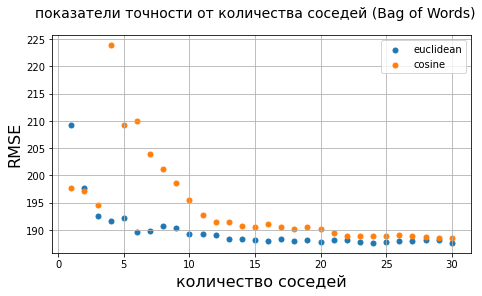

In [199]:
fig, ax = plt.subplots()
x1 = np.arange(1, 31)
y1 = l[x1-1]
x2 = np.arange(1, 31) 
y2 = lcos[x2-1]
x3 = [1, 15, 25]
y3 = [180, 200, 220]
ax.scatter(x1, y1, label ='euclidean', s=25)
ax.scatter(x2, y2, label ='cosine', s = 25)
#ax.plot.scatter(x3, y3, label ='our')

fig.suptitle('показатели точности от количества соседей (Bag of Words)', fontsize= 14)
ax.set_ylabel('RMSE', size = 16)
ax.set_xlabel('количество соседей', size = 16)
ax.legend()
ax.grid()
fig.set_figwidth(7.5)    
fig.set_figheight(4) 
#plt.savefig('C:/Users/User/Jupiter_notebook/strategy_10_20_50_100.pdf')
plt.show()

In [163]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(smooth_idf=False)

In [156]:
vectorizer = CountVectorizer()
vectorizer

CountVectorizer()

In [159]:
corpus = data['name']
X = vectorizer.fit_transform(corpus)
X

<48895x8057 sparse matrix of type '<class 'numpy.int64'>'
	with 280359 stored elements in Compressed Sparse Row format>

In [160]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [164]:
trX = transformer.fit_transform(X.toarray())
trX

<48895x8057 sparse matrix of type '<class 'numpy.float64'>'
	with 280359 stored elements in Compressed Sparse Row format>

In [167]:
trX_train_txt = trX.toarray()[:34226]
trX_test_txt = trX.toarray()[34226:]
trY_train_txt = data['price'][:34226]
trY_test_txt = data['price'][34226:]

In [168]:
choice = np.random.choice(trX.toarray().shape[1], 1000, replace = False)

In [200]:
from sklearn.metrics import mean_squared_error
tl = []
for i in range(1, 31):
    TEXT = KNNRegressor_2(i, metric='euclidean', mode = 'distance')
    TEXT.fit(trX_train_txt[:10000, choice], trY_train_txt)
    a = TEXT.predict(trX_test_txt[:1000, choice], n_neighbors=10)
    tl = np.append(tl, np.sqrt(mean_squared_error(a, trY_test_txt[:1000])))

In [201]:
tl

array([224.18789218, 207.39505063, 199.75942901, 197.0360063 ,
       196.82787943, 193.08701276, 192.67000386, 193.17332927,
       192.71604093, 191.91166844, 191.5344181 , 190.80783727,
       190.29558164, 190.51765907, 191.06522493, 191.16880334,
       191.2032513 , 191.00789088, 190.83836883, 190.6978352 ,
       190.78887616, 190.64132306, 190.57887492, 190.35232452,
       190.23894446, 190.22590236, 190.12247045, 189.93724908,
       189.94343797, 189.9023462 ])

In [202]:
from sklearn.metrics import mean_squared_error
tlcos = []
for i in range(1, 31):
    TEXT = KNNRegressor_2(i, metric='cosine', mode = 'distance')
    TEXT.fit(trX_train_txt[:10000, choice], trY_train_txt)
    a = TEXT.predict(trX_test_txt[:1000, choice], n_neighbors=10)
    tlcos = np.append(tlcos, np.sqrt(mean_squared_error(a, trY_test_txt[:1000])))

In [203]:
tlcos

array([189.55895653, 193.73850901, 191.36647257, 226.32945032,
       209.36485034, 210.03276935, 205.00773198, 202.64793562,
       200.76724982, 197.19096972, 194.56160488, 192.8908507 ,
       192.38432215, 192.61337419, 192.98134999, 192.76077234,
       192.29754417, 191.15869897, 191.45117826, 190.68926126,
       190.31611815, 190.07496654, 189.84869034, 189.75458079,
       189.67460862, 189.56844077, 189.52156137, 189.23608373,
       189.16336624, 189.10906119])

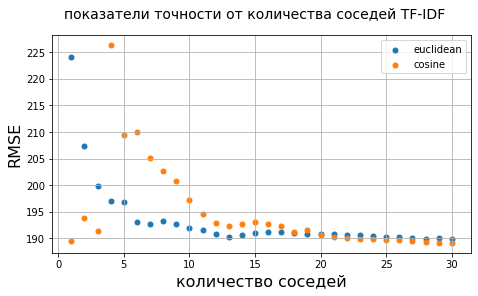

In [256]:
fig, ax = plt.subplots()
x1 = np.arange(1, 31)
y1 = tl[x1-1]
x2 = np.arange(1, 31) 
y2 = tlcos[x2-1]
ax.scatter(x1, y1, label ='euclidean', s=25)
ax.scatter(x2, y2, label ='cosine', s = 25)
#ax.plot.scatter(x3, y3, label ='our')

fig.suptitle('показатели точности от количества соседей TF-IDF', fontsize= 14)
ax.set_ylabel('RMSE', size = 16)
ax.set_xlabel('количество соседей', size = 16)
ax.legend()
ax.grid()
fig.set_figwidth(7.5)    
fig.set_figheight(4) 
#plt.savefig('C:/Users/User/Jupiter_notebook/strategy_10_20_50_100.pdf')
plt.show()

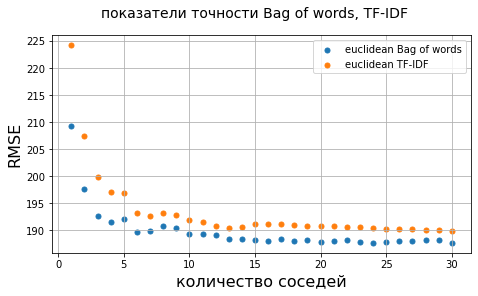

In [211]:
fig, ax = plt.subplots()
x1 = np.arange(1, 31)
y1 = l[x1-1]
x2 = np.arange(1, 31) 
y2 = tl[x2-1]
ax.scatter(x1, y1, label ='euclidean Bag of words', s=25)
ax.scatter(x2, y2, label ='euclidean TF-IDF', s = 25)
#ax.plot.scatter(x3, y3, label ='our')

fig.suptitle('показатели точности Bag of words, TF-IDF', fontsize= 14)
ax.set_ylabel('RMSE', size = 16)
ax.set_xlabel('количество соседей', size = 16)
ax.legend()
ax.grid()
fig.set_figwidth(7.5)    
fig.set_figheight(4) 
plt.show()

Лучше использовать евклидову метрику, она показала себя лучше в обоих случаях. 

Bag of words показал точность немного лучше, чем TF-IDF. Возможно, это  связано с тем, что у нас мало повторяющихся слов в выборке и поэтому нормировка не принесла повышения точности.

**3.2 (1 балл)** Используя все доступные признаки, решите задачу регрессии. Для категориальных и текстовых признаков выберите лучшие преобразования (из сделанных раннее заданий). Повлияло ли добавление количественного признака на метрику качества?

возьмем в этой задаче выборку из 1000 элементов, которую мы строили в прошлом задании

In [243]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2018-10-19 00:00:00,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2018-10-19 00:00:00,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2018-10-19 00:00:00,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2018-10-19 00:00:00,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2018-10-19 00:00:00,0.00,6,2


In [356]:
Xlst_train, Xlst_test, ylst_train, ylst_test = train_test_split(data.drop(columns=['price']), data[['price']],
                                                    test_size=0.3, shuffle=False)

In [357]:
X_train_txt.shape

(34226, 8057)

In [358]:
X_test_txt.shape

(14669, 8057)

In [359]:
Xlst_train.shape

(34226, 15)

это наши текстовые признаки

In [360]:
def fstd(x):
    counts = np.zeros_like(x)
    for i in (np.unique(x)):
        counts[x == i] = np.std(ylst_train[x == i]['price'])
        #np.mean(y_train(np.where(x == i)[0])['price'])
    return counts

In [361]:
def fstdtest(x, x_train_start, x_train_fin):
    counts = np.zeros_like(x)
    for i in (np.unique(x)):
        if i not in (np.unique(x_train_start)):
            counts[x == i] = 0
        else:
            counts[np.where(x == i)[0]] = x_train_fin[np.where(x_train_start == i)[0]][0]
    return counts

In [362]:
Tr_tsd_host_name = fstd(Xlst_train['host_name'])
Tr_std_neighbourhood_group = fstd(Xlst_train['neighbourhood_group'])
Tr_std_room_type = fstd(Xlst_train['room_type'])
Tr_std_neighbourhood = fstd(Xlst_train['neighbourhood'])

In [278]:
Test_std_host_name = fstdtest(Xlst_test['host_name'], Xlst_train['host_name'], Tr_tsd_host_name)
Test_std_neighbourhood_group = fstdtest(Xlst_test['neighbourhood_group'], Xlst_train['neighbourhood_group'], Tr_std_neighbourhood_group)
Test_std_room_type = fstdtest(Xlst_test['room_type'], Xlst_train['room_type'], Tr_std_room_type)
Test_std_neighbourhood = fstdtest(Xlst_test['neighbourhood'], Xlst_train['neighbourhood'], Tr_std_neighbourhood)

In [279]:
X_train_last_std = np.concatenate((Tr_tsd_host_name[:, np.newaxis], Tr_std_neighbourhood_group[:, np.newaxis], Tr_std_room_type[:, np.newaxis], Tr_std_neighbourhood[:, np.newaxis]), axis=1)
X_test_last_std = np.concatenate((Test_std_host_name[:, np.newaxis], Test_std_neighbourhood_group[:, np.newaxis], Test_std_room_type[:, np.newaxis], Test_std_neighbourhood[:, np.newaxis]), axis=1)

In [280]:
X_train_last_std.shape

(34226, 4)

In [281]:
X_test_last_std.shape

(14669, 4)

In [282]:
vectorizer = CountVectorizer()
vectorizer

CountVectorizer()

In [283]:
corpus = data['name']
X = vectorizer.fit_transform(corpus)
X

<48895x8057 sparse matrix of type '<class 'numpy.int64'>'
	with 280359 stored elements in Compressed Sparse Row format>

In [284]:
X_train_last_txt = X.toarray()[:34226]

In [293]:
X_train_last_txt.shape

(34226, 8057)

In [285]:
X_test_last_txt = X.toarray()[34226:]

In [286]:
X_test_last_txt.shape

(14669, 8057)

In [287]:
choice = np.random.choice(X.toarray().shape[1], 1000, replace = False)

In [307]:
X_train_all = np.concatenate((X_train_last_txt[:, choice], X_train_last_std), axis =1)
X_test_all = np.concatenate((X_test_last_txt[:, choice], X_test_last_std), axis =1)

In [308]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2018-10-19 00:00:00,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2018-10-19 00:00:00,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2018-10-19 00:00:00,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2018-10-19 00:00:00,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2018-10-19 00:00:00,0.00,6,2


In [309]:
Xlst_train['latitude'][:, np.newaxis].shape

(34226, 1)

In [310]:
X_train_all = np.concatenate((X_train_all, Xlst_train['latitude'][:, np.newaxis]), axis =1)

In [311]:
X_train_all = np.concatenate((X_train_all, Xlst_train['longitude'][:, np.newaxis]), axis =1)

In [312]:
X_train_all = np.concatenate((X_train_all, Xlst_train['minimum_nights'][:, np.newaxis]), axis =1)

In [313]:
X_train_all = np.concatenate((X_train_all, Xlst_train['number_of_reviews'][:, np.newaxis]), axis =1)

In [314]:
X_train_all = np.concatenate((X_train_all, Xlst_train['reviews_p#er_month'][:, np.newaxis]), axis =1)

In [315]:
X_train_all = np.concatenate((X_train_all, Xlst_train['calculated_host_listings_count'][:, np.newaxis]), axis =1)

In [316]:
X_train_all = np.concatenate((X_train_all, Xlst_train['availability_365'][:, np.newaxis]), axis =1)

In [317]:
X_train_all.shape

(34226, 1011)

In [318]:
X_test_all = np.concatenate((X_test_all, Xlst_test['latitude'][:, np.newaxis]), axis =1)
X_test_all = np.concatenate((X_test_all, Xlst_test['longitude'][:, np.newaxis]), axis =1)
X_test_all = np.concatenate((X_test_all, Xlst_test['minimum_nights'][:, np.newaxis]), axis =1)
X_test_all = np.concatenate((X_test_all, Xlst_test['number_of_reviews'][:, np.newaxis]), axis =1)
X_test_all = np.concatenate((X_test_all, Xlst_test['reviews_per_month'][:, np.newaxis]), axis =1)
X_test_all = np.concatenate((X_test_all, Xlst_test['calculated_host_listings_count'][:, np.newaxis]), axis =1)
X_test_all = np.concatenate((X_test_all, Xlst_test['availability_365'][:, np.newaxis]), axis =1)

In [319]:
X_test_all.shape

(14669, 1011)

In [320]:
dfX_test_all = pd.DataFrame(X_test_all)

In [321]:
dfX_train_all = pd.DataFrame(X_train_all)

In [329]:
#from sklearn import preprocessing
#from sklearn.preprocessing import MinMaxScaler

In [330]:
#scaler = MinMaxScaler()

In [331]:
#atr = scaler.fit_transform(dfX_train_all.values)
#atst = scaler.fit_transform(dfX_test_all.values)

In [371]:
X_test_all.shape

(14669, 1011)

In [363]:
np.array(ylst_test['price'])

array([ 40,  85,  34, ..., 115,  55,  90], dtype=int64)

In [368]:
X_train_all.shape

(34226, 1011)

In [370]:
np.array(ylst_test['price']).shape

(14669,)

In [372]:
np.array(ylst_train['price']).shape

(34226,)

In [374]:
from sklearn.metrics import mean_squared_error
#tlcos = []
#for i in range(1, 31):
RES = KNNRegressor_2(10, metric='euclidean', mode = 'distance')
RES.fit(X_train_all, np.array(ylst_train['price']))
a = RES.predict(X_test_all, n_neighbors=10)
print(np.sqrt(mean_squared_error(a, np.array(ylst_test['price']))))

243.64181422142926


In [377]:
from sklearn.metrics import mean_squared_error
tll = []
for i in range(1, 21):
    RES = KNNRegressor_2(i, metric='euclidean', mode = 'distance')
    RES.fit(X_train_all, np.array(ylst_train['price']))
    a = RES.predict(X_test_all, n_neighbors=10)
#print(np.sqrt(mean_squared_error(a, np.array(ylst_test['price']))))
    print(i, ' neib-', np.sqrt(mean_squared_error(a, np.array(ylst_test['price']))))

1  neib- 329.18517287710523
2  neib- 283.2155831607878
3  neib- 268.7857899526718
4  neib- 261.26686149666415
5  neib- 255.98934643497856
6  neib- 250.78361041738773
7  neib- 248.2917882350709
8  neib- 246.13608351832542
9  neib- 244.76652903111943
10  neib- 243.64181422142926
11  neib- 242.54833136677692
12  neib- 241.5291618524057
13  neib- 240.7858826335953
14  neib- 240.58507449154456
15  neib- 240.17002896981896
16  neib- 239.0329401845562
17  neib- 238.63292202041254
18  neib- 237.91199030133106
19  neib- 237.6428700898126
20  neib- 237.7712617790949


## Часть 4: Выводы ##

Показатели точности не являются приемлемыми. Вероятно, это связано с тем, что наши признаки не нормированы. Евклидовая метрика считает расстояния основываясь на самых больших признаках. Однако, в любом случае, точность после преобразований текстовых и категориальных признаков увеличилась, что показывает разумность их применения. Возможно, для более точного предсказания необходимо иметь большее количество полезных признаков